In [1]:
# %load_ext autoreload
# %autoreload 2
import pandas as pd
import matplotlib.pyplot as plt



from main import run
from players import tit4tat, random_player, always_defect, always_cooperate

In [2]:
rounds_df, tournament_df = run(
    players=[tit4tat, random_player, always_defect, always_cooperate]
)

RUNNING tit4tat vs random_player
RUNNING tit4tat vs always_defect
RUNNING tit4tat vs always_cooperate
RUNNING random_player vs always_defect
RUNNING random_player vs always_cooperate
RUNNING always_defect vs always_cooperate


In [3]:
rounds_df.head()

,player1,player2,tournament_id,round_number,player1_history_them,player2_history_them,player1_play,player2_play,player1_score,player2_score
0,tit4tat,random_player,5137344736,1,cooperate,cooperate,cooperate,cooperate,3,3
1,tit4tat,random_player,5137344736,2,defect,cooperate,cooperate,defect,3,8
2,tit4tat,random_player,5137344736,3,defect,defect,defect,defect,4,9
3,tit4tat,random_player,5137344736,4,cooperate,defect,defect,cooperate,9,9
4,tit4tat,random_player,5137344736,5,defect,cooperate,cooperate,defect,9,14


In [11]:
tournament_df.head(20)

,player1_score,player2_score,player1,player2
0,436,436,tit4tat,random_player
1,199,204,tit4tat,always_defect
2,600,600,tit4tat,always_cooperate
3,105,580,random_player,always_defect
4,790,315,random_player,always_cooperate
5,1000,0,always_defect,always_cooperate


# Tournament Data

In [10]:
# Reshape the DataFrame to list player names and their scores in two columns
player_scores = pd.concat([
    tournament_df[['player1', 'player1_score']].rename(columns={'player1': 'player', 'player1_score': 'score'}),
    tournament_df[['player2', 'player2_score']].rename(columns={'player2': 'player', 'player2_score': 'score'})
])

# Group by player name and sum the scores
total_scores = player_scores.groupby('player')['score'].sum().reset_index()

# Display the results
print(total_scores)

             player  score
0  always_cooperate    915
1     always_defect   1784
2     random_player   1331
3           tit4tat   1235


# Rounds Data

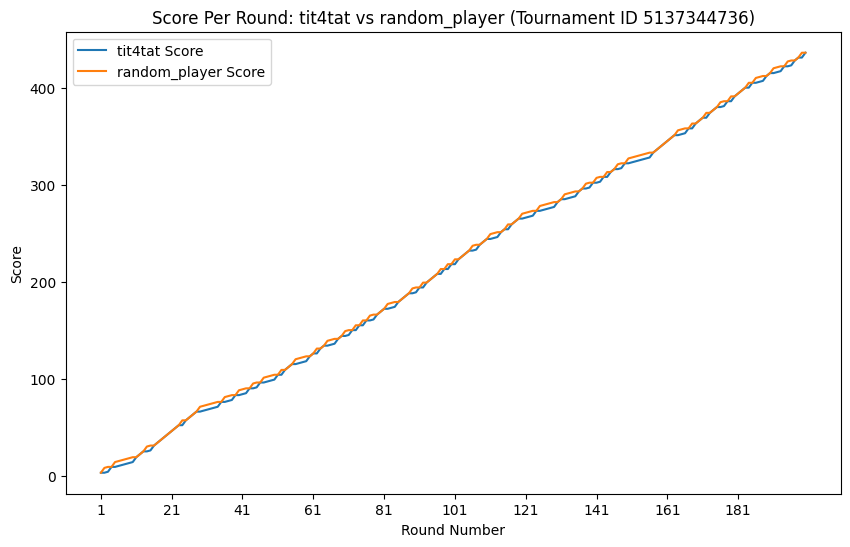

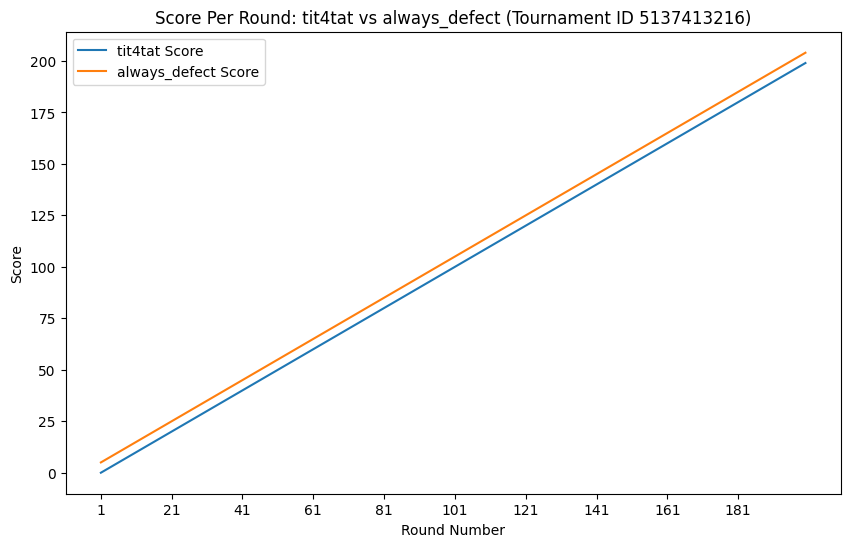

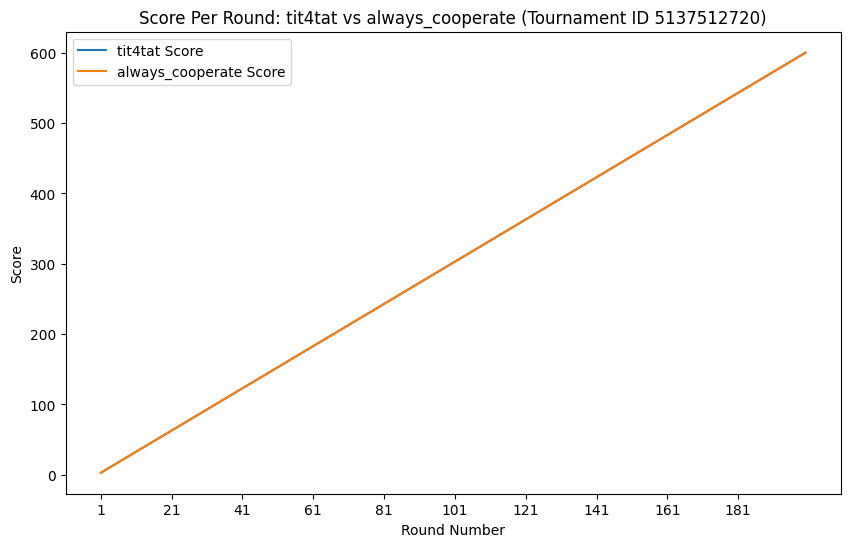

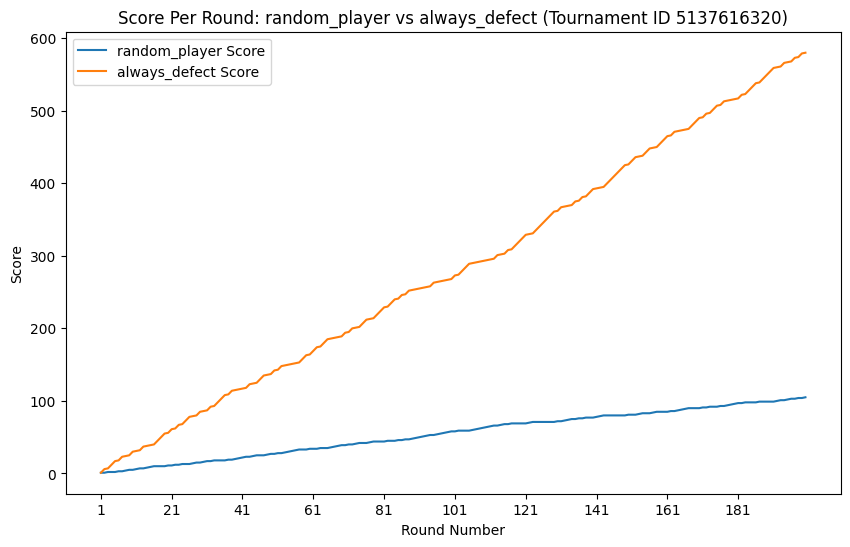

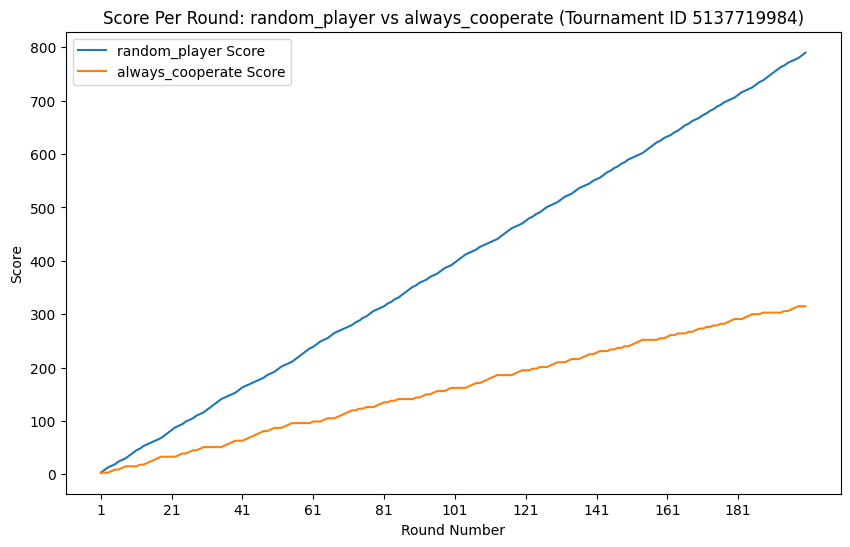

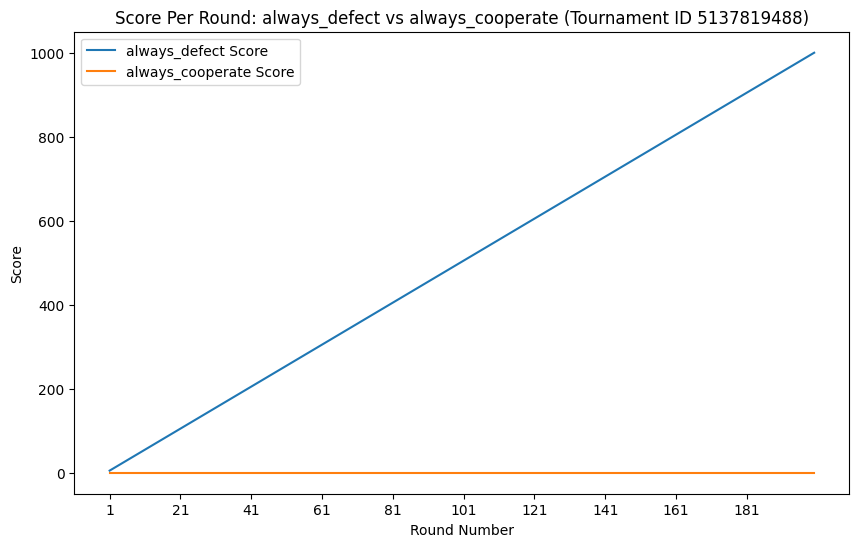

In [16]:
rounds_df['round_number'] = pd.to_numeric(rounds_df['round_number'])
rounds_df['player1_score'] = pd.to_numeric(rounds_df['player1_score'])
rounds_df['player2_score'] = pd.to_numeric(rounds_df['player2_score'])

# Group by tournament ID
for tournament_id in rounds_df['tournament_id'].unique():
    tournament_df = rounds_df[rounds_df['tournament_id'] == tournament_id]

    # Creating a descriptive name for the matchup
    player1_name = tournament_df['player1'].iloc[0]
    player2_name = tournament_df['player2'].iloc[0]
    match_name = f"{player1_name} vs {player2_name}"

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(tournament_df['round_number'], tournament_df['player1_score'], label=f'{player1_name} Score', marker=None)
    plt.plot(tournament_df['round_number'], tournament_df['player2_score'], label=f'{player2_name} Score', marker=None)

    # Adding titles and labels
    plt.title(f'Score Per Round: {match_name} (Tournament ID {tournament_id})')
    plt.xlabel('Round Number')
    plt.ylabel('Score')

    # Set x-axis ticks: Reduce the number of x-axis ticks
    max_round = tournament_df['round_number'].max()
    plt.xticks(range(1, max_round + 1, max(1, max_round // 10)))  # Show a tick every 10% of the rounds or at least 1

    plt.legend()

    # Display the plot
    plt.show()

In [17]:
def emoji_play(play):
    if play == 'cooperate':
        return '🟢'
    return '🔴'
# def pretty_print(df):

In [19]:
rounds_df['player1'][0], rounds_df['player2'][0]

('tit4tat', 'random_player')

In [23]:
player1 = 'tit4tat'
player2 = 'random_player'

filtered_df = rounds_df[(rounds_df['player1'] == player1) & (rounds_df['player2'] == player2)]

print("Rounds between ", player1, "and", player2)

for i, row in filtered_df.iterrows():
    print(emoji_play(row['player1_play']),  emoji_play(row['player2_play']))

Rounds between  tit4tat and random_player
🟢 🟢
🟢 🔴
🔴 🔴
🔴 🟢
🟢 🔴
🔴 🔴
🔴 🔴
🔴 🔴
🔴 🔴
🔴 🔴
🔴 🟢
🟢 🟢
🟢 🟢
🟢 🔴
🔴 🔴
🔴 🟢
🟢 🟢
🟢 🟢
🟢 🟢
🟢 🟢
🟢 🟢
🟢 🟢
🟢 🟢
🟢 🔴
🔴 🟢
🟢 🟢
🟢 🟢
🟢 🟢
🟢 🔴
🔴 🔴
🔴 🔴
🔴 🔴
🔴 🔴
🔴 🔴
🔴 🟢
🟢 🔴
🔴 🔴
🔴 🔴
🔴 🟢
🟢 🔴
🔴 🔴
🔴 🔴
🔴 🟢
🟢 🔴
🔴 🔴
🔴 🟢
🟢 🔴
🔴 🔴
🔴 🔴
🔴 🔴
🔴 🟢
🟢 🔴
🔴 🟢
🟢 🟢
🟢 🟢
🟢 🔴
🔴 🔴
🔴 🔴
🔴 🔴
🔴 🟢
🟢 🟢
🟢 🔴
🔴 🟢
🟢 🟢
🟢 🔴
🔴 🔴
🔴 🔴
🔴 🟢
🟢 🟢
🟢 🔴
🔴 🔴
🔴 🟢
🟢 🔴
🔴 🟢
🟢 🔴
🔴 🟢
🟢 🔴
🔴 🔴
🔴 🟢
🟢 🟢
🟢 🟢
🟢 🔴
🔴 🔴
🔴 🔴
🔴 🟢
🟢 🟢
🟢 🟢
🟢 🟢
🟢 🔴
🔴 🔴
🔴 🟢
🟢 🔴
🔴 🟢
🟢 🟢
🟢 🟢
🟢 🟢
🟢 🔴
🔴 🟢
🟢 🔴
🔴 🟢
🟢 🔴
🔴 🟢
🟢 🟢
🟢 🟢
🟢 🟢
🟢 🔴
🔴 🔴
🔴 🟢
🟢 🟢
🟢 🟢
🟢 🔴
🔴 🔴
🔴 🔴
🔴 🟢
🟢 🟢
🟢 🔴
🔴 🟢
🟢 🟢
🟢 🟢
🟢 🔴
🔴 🔴
🔴 🔴
🔴 🔴
🔴 🟢
🟢 🔴
🔴 🔴
🔴 🔴
🔴 🔴
🔴 🔴
🔴 🟢
🟢 🟢
🟢 🔴
🔴 🔴
🔴 🔴
🔴 🔴
🔴 🟢
🟢 🟢
🟢 🔴
🔴 🔴
🔴 🟢
🟢 🔴
🔴 🔴
🔴 🟢
🟢 🔴
🔴 🟢
🟢 🟢
🟢 🔴
🔴 🔴
🔴 🟢
🟢 🔴
🔴 🔴
🔴 🔴
🔴 🔴
🔴 🔴
🔴 🔴
🔴 🔴
🔴 🟢
🟢 🟢
🟢 🟢
🟢 🟢
🟢 🟢
🟢 🟢
🟢 🟢
🟢 🔴
🔴 🔴
🔴 🔴
🔴 🟢
🟢 🔴
🔴 🟢
🟢 🟢
🟢 🟢
🟢 🔴
🔴 🟢
🟢 🟢
🟢 🟢
🟢 🔴
🔴 🔴
🔴 🟢
🟢 🔴
🔴 🟢
🟢 🟢
🟢 🟢
🟢 🟢
🟢 🔴
🔴 🟢
🟢 🔴
🔴 🔴
🔴 🔴
🔴 🟢
🟢 🟢
🟢 🔴
🔴 🔴
🔴 🔴
🔴 🟢
🟢 🔴
🔴 🔴
🔴 🟢
🟢 🟢
🟢 🔴
🔴 🟢
